# **Training Deep Neural Networks**

Before deep diving, I clarify my understanding of Deep Learning's architecture and how, where and why they are applied.

| Category             | Examples & Notes |
|---------------------|-----------------|
| **Architectures**    | **Feedforward-based:** MLP, DNN |
|                     | **Convolutional:** CNN |
|                     | **Recurrent/Sequential:** RNN, LSTM, GRU (Used for text, speech, time series; have memory and feedback connections) |
|                     | **Attention-based:** Transformer (Used in NLP, vision, multimodal tasks; e.g., BERT, GPT) |
|                     | **Graph-based:** GNN, GAN |
| **Training algorithms** | Backpropagation |
|                     | BPTT (Backpropagation Through Time) – for RNNs |
|                     | Contrastive Divergence |
|                     | **Optimizers (used with BP):** SGD, Adam, RMSProp |
|                     | **Alternatives:** Genetic algorithms, Reinforcement Learning |



**Resources**

- **Feedforward Explained**: [YouTube Video](https://youtu.be/dgGyGY0p9jM?si=GW2FC93dgrKgFjHZ)

- **What is neural network?**: [YouTube Video](https://youtu.be/VERDOXn84dw?si=UjeeMltVOt5DkFOB)



---

# Backward Propagation

The process a neural network uses to learn from its mistakes.


1.   Make a prediction (forward pass)

      - The input goes through the network layer by layer, producing an output.

2.   Measure the error

      - The network compares its prediction with the correct answer using a loss (cost) function.

3.   Send the error backward

      - The error is passed from the output layer back to the input layer. This is why it’s called backward propagation.

4.    Compute gradients

      - For each weight, the network calculates:


> If this weight changes a little, how much will the error change?” This value is the gradient.

5.    Update the weights

      - Using Gradient Descent, each weight is adjusted slightly to reduce the error.




```python
# Import TensorFlow and Keras
from tensorflow import keras
from tensorflow.keras import layers

# Define a Sequential model
# Sequential means layers are stacked one after another
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),  # Hidden layer 1 with 64 neurons, ReLU activation, input has 10 features
    layers.Dense(64, activation='relu'),  # Hidden layer 2 with 64 neurons
    layers.Dense(1)  # Output layer with 1 neuron (for regression)
])

# Show model summary
model.summary()
```





`compile()`is where you set up backpropagation: defining loss function and optimizer.

```python
import numpy as np

# Random dataset
X_train = np.random.rand(1000, 10)  # 1000 samples, 10 features each
Y_train = np.random.rand(1000, 1)   # 1000 targets

# Compile the model
model.compile(optimizer='adam', loss='mse')  # MSE = Mean Squared Error

# Train the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.2)

```

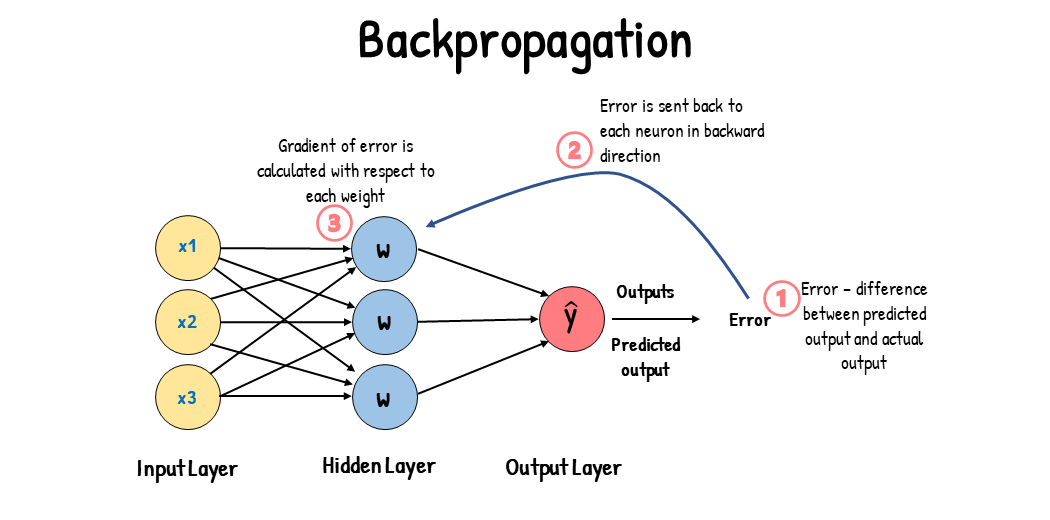

## **Problem 1 : Vanishing & Exploding Gradients**

Deep neural networks often struggle with **vanishing** and **exploding gradients**, which make training difficult and unstable.


- Vanishing Gradients 📉
  - Gradients become **smaller and smaller** in lower layers  
  - Causes **very slow learning**
  - Model fails to converge ❌ to a good solution  

- Exploding Gradients 📈
  - Gradients grow **too large**  
  - Leads to **unstable training**💥and divergence  
  - Common in RNNs

- Unstable Learning
  - Different layers learn at **very different speeds**  
  - Some layers learn fast, others barely learn at all  


> These problems are especially common in **very deep networks**

```Keeping gradients stable is essential for training deep neural networks successfully.```


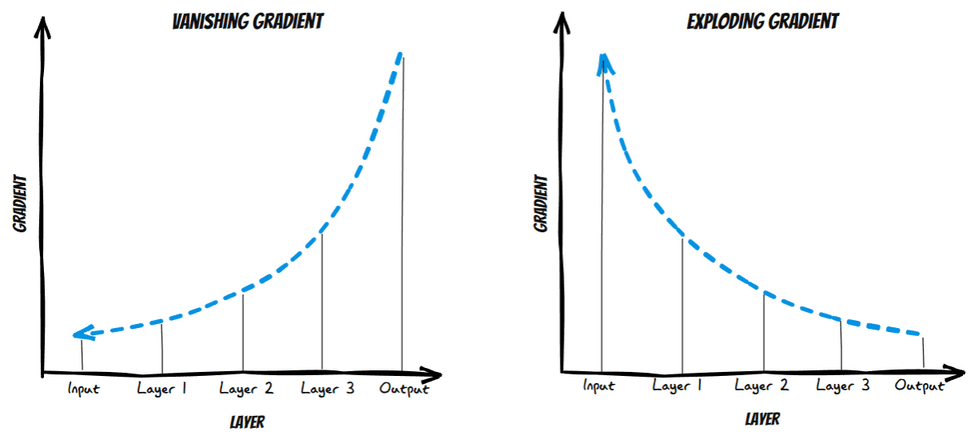

---

# **Solution 1: Nonsaturating Activation Functions**

Glorot & Bengio identified key causes in 2010:

1.   Using sigmoid activation with old random normal weight initialization.
  > At the time, networks commonly used the logistic sigmoid activation and initialized weights from a normal distribution with mean 0 and standard deviation 1. This combination caused signals to be poorly scaled as they passed through layers, making gradients unstable during backpropagation.


2.   Layer output variance increases as data moves forward through the network.
  > They showed that with this setup, the variance of layer outputs grows as data moves forward through the network. Each layer amplifies the variance slightly, so deeper layers receive inputs that are either very large or very small.

3.  Activations saturate in upper layers, worsening gradient flow.
  > When inputs become too large or too small, the sigmoid function saturates (outputs close to 0 or 1).  
  > In these regions, the derivative of the sigmoid is near zero, so gradients become extremely small during backpropagation. This strongly worsens the vanishing gradient problem.

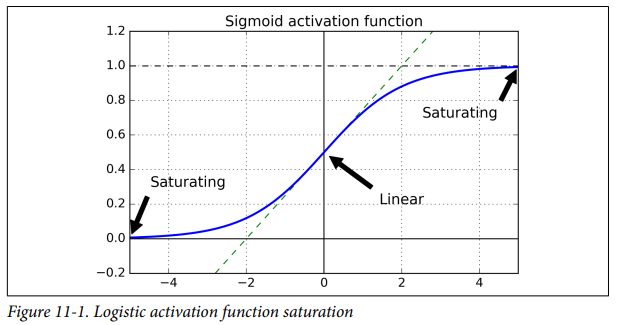

4.  Sigmoid’s mean of 0.5 (not zero) contributes to the problem; tanh works slightly better because it has zero mean.     

> The sigmoid function has an average output around 0.5, not 0.   

> This shifts activations in one direction, causing biased gradient updates and slower convergence.     

> The *tanh* activation performs slightly better because it is *zero-centered* (mean zero), which helps gradients flow more symmetrically and improves learning in deep networks.

### Activation Functions Comparison: Sigmoid vs Tanh vs ReLU

| Feature                    | Sigmoid 😐           | Tanh 🙂               | ReLU 🚀                  |
|----------------------------|-------------------|-------------------|-------------------------|
| **Formula**               | 1 / (1 + e^-x)     | tanh(x)           | max(0, x)               |
| **Output range**           | (0, 1)             | (-1, 1)           | [0, ∞)                  |
| **Zero-centered?**         | ❌ 0.5 mean        | ✅ 0 mean         | ❌ partially zero       |
| **Gradient issues**        | Saturates → vanishing | Saturates → less vanishing | No vanishing for x>0   |
| **Computation cost**       | Medium              | Medium            | Very low                |
| **Best for**               | Shallow networks   | Shallow / medium depth | Deep networks           |
| **Notes**                  | Biased gradients    | Better than sigmoid | Very fast training; sometimes "dead neurons" for x<0 |

---

**Key takeaway:**


- **Sigmoid** → outdated for deep networks  
- **Tanh** → better, but still limited  
- **ReLU** → standard choice for modern deep networks 🚀

> ReLU is preferred in deep networks because it avoids vanishing gradients and trains faster than sigmoid or tanh.
  - Shallow networks: sigmoid/tanh can work
  - Deep networks: ReLU (and variants like Leaky ReLU, ELU) are preferred


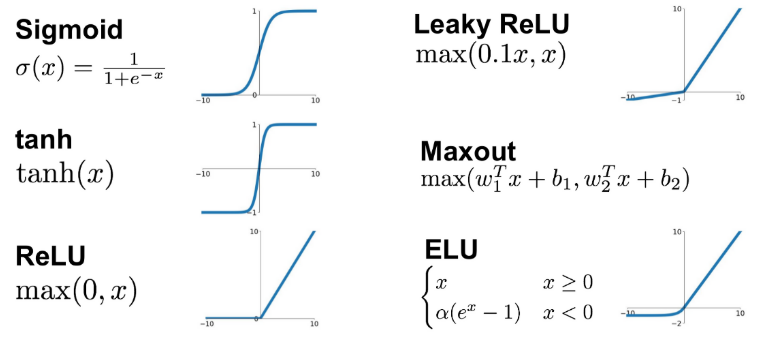

---

# **Solution 2: Weight Initilization**

### Importance of Weight Initialization

The choice of weight initialization method can significantly impact


- convergence speed,
- training stability, and
- generalization ability of neural networks.

> Properly initialized weights can help prevent issues such as vanishing gradients, exploding gradients, and slow convergence, leading to more efficient and effective learning. Remember weights will go as inputs yo activation function.

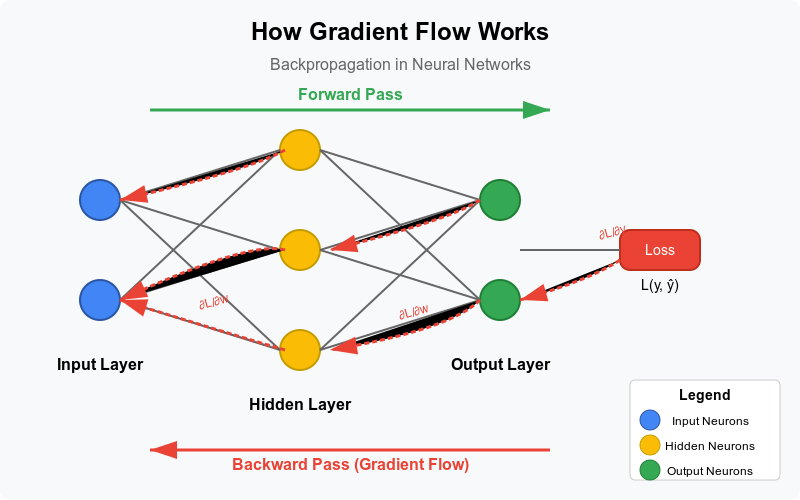

So, to learn about weight initialization, I would go from the previous learning above.


1.   Glorot(Xavier) initialization (designed for sigmoid, tanh)
2.   He(Kaiming) initialization (ReLU)



> 😄 I added pictures of the researchers behind the initialization methods so I can visualize their names and faces while learning. A little fun fact from my NN learning journey! 🧠✨

### **Xavier Glorot Initialization**
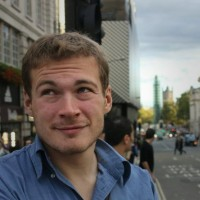

Glorot and Bengio propose a way to significantly alleviate this problem. We need the signal to flow properly in both directions: in the forward direction when making predictions, and in the reverse direction when backpropagating gradients. We don’t want the signal to die out, nor do we want it to explode and saturate.


For the signal to flow properly, the authors argue that we need the variance of the outputs of each layer to be equal to the variance of its inputs and we also need the gradients to have equal variance before and after flowing through a layer in the reverse direction.

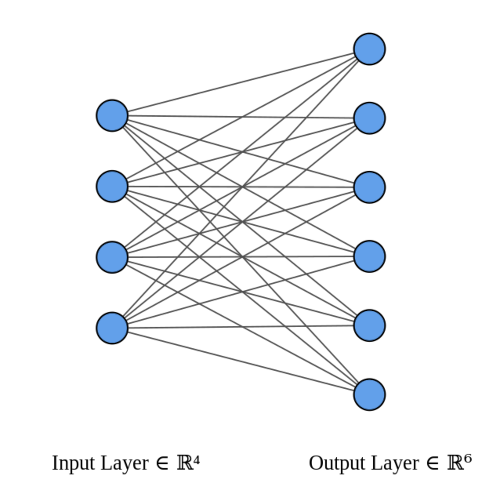

- fan-in = 4
- fan-out = 6

It is not possible to perfectly keep the signal strength the same when it passes through a layer unless the number of input connections (fan<sub>in</sub>) equals the number of output neurons (fan<sub>out</sub>). Since this is usually not the case, Glorot and Bengio proposed a practical compromise that works very well in real models.

Their idea is to initialize the weights randomly, but to scale them using both the fan-in and fan-out of the layer. They define

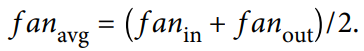


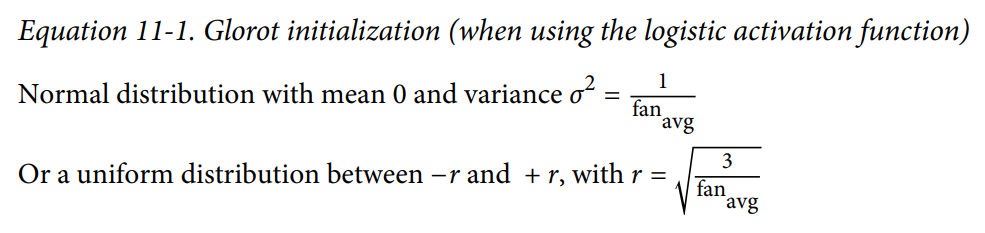

As I learn that Xavier initialization is good for sigmoid and tanh, it means like while using these functions, weight is randomly initialize in normal or uniform distribution and also scaled according to the layer’s fan<sub>in</sub> and fan<sub>out</sub>.

As a result, the neurons are less likely to saturate, and gradients can flow more easily during backpropagation.

**Note: LeCun Initialization**

> If you just replace fan.avg with fan.in in *Equation 11-1*, you get an initialization strategy that was actually already proposed by Yann LeCun in the 1990s, called LeCun initialization. It is equivalent to Glorot initialization when fan<sub>in</sub> = fan<sub>out</sub>. It took over a decade for researchers to realize just how important this trick really is. Using Glorot initialization can speed up training considerably, and it is one of the tricks that led to the current success of Deep Learning.


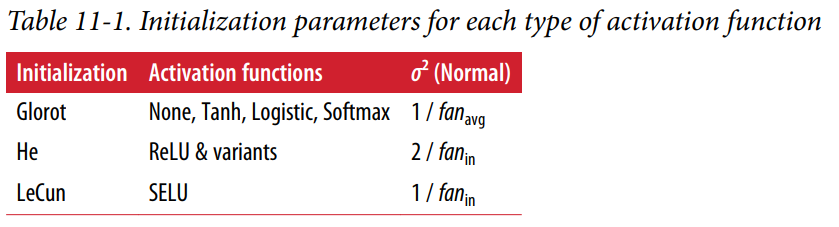

By default, keras uses Glorot initilization with uniform distribution.


You can change this to He initialization by setting ```kernel_initializer="he_uniform"``` or ```kernel_initializer="he_normal"``` when creating a layer, like this:

```python
keras.layers.Dense(10, activation="relu") # Default = Glorot
```

```python
# Example of He initialization in TensorFlow
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
```

```python
# Another way to initialize
initializer = tf.keras.initializers.HeNormal()
layer = tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer=initializer)
```

If you want He initialization with a uniform distribution, but **based on fan.avg rather than fan.in**,
- you can use the VarianceScaling initializer like this:

```python
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')

keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)
```

### **Kaiming He Initialization**
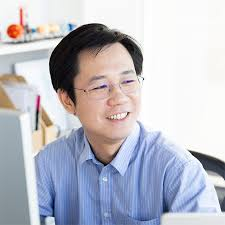

> He Initialization is particularly well-suited for networks using ReLU (Rectified Linear Unit) activation functions. ReLU tends to zero out negative inputs, which can lead to a loss of variance in the network. To address this, He Initialization sets the variance of the weights to be twice as large as Glorot Initialization.

He initialization is modified from limitation of Xavier initialization for ReLU.

Both Glorot and He Initializations aim to balance the variance of the outputs and gradients across layers. This balance helps maintain a stable flow of gr
adients during backpropagation, preventing them from vanishing or exploding. By setting the weights based on the number of input & output neurons, these methods ensure that the network learns effectively from the data.

### LeCun Initialization

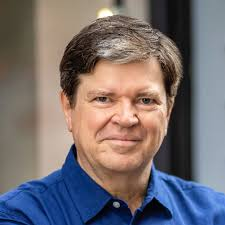


LeCun Initialization is designed for networks using the SELU (Scaled Exponential Linear Unit) activation function. It sets the variance as:

> Var = 1 / fan<sub>in</sub>

LeCun Initialization works best with SELU because it maintains self-normalizing properties within the network.

# **Continued form Nonsaturating Activation Functions**

### ReLU's limitation (dying ReLUs)

> Unfortunately, the ReLU activation function is not perfect. It suffers from a problem known as the dying ReLUs: during training, some neurons effectively die, meaning they stop outputting anything other than 0.

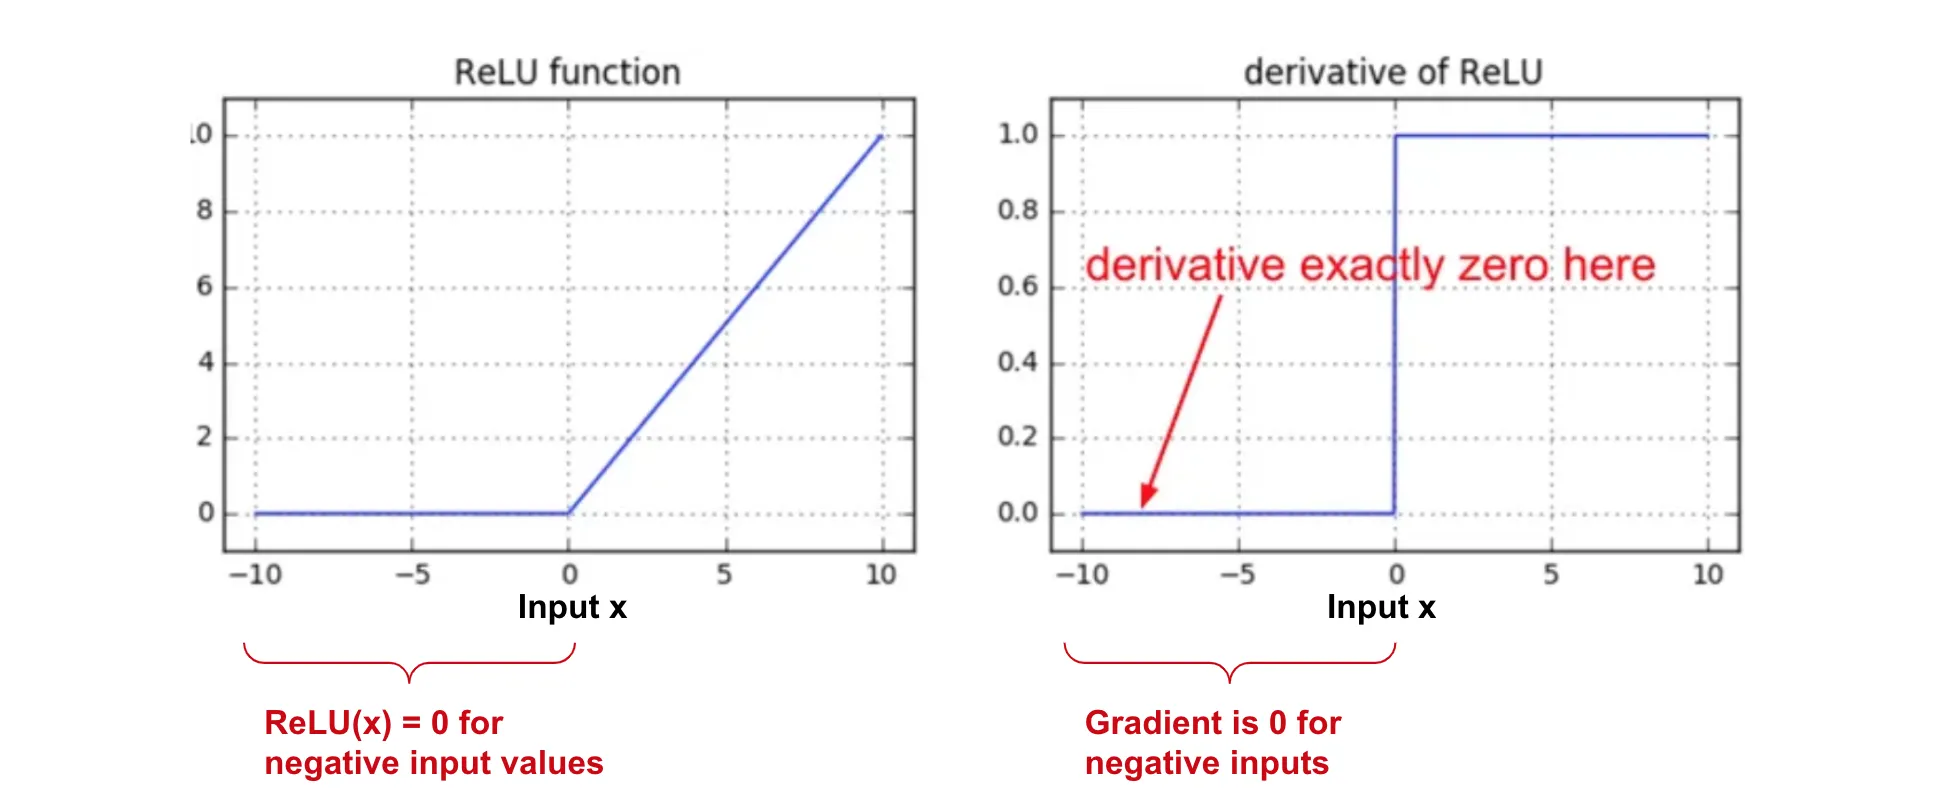

During training, some neurons start outputting only 0 for every input. This often happens when the learning rate is too large and weight updates push the neuron into a region where its input is always negative.

When a ReLU neuron’s input is negative:

- Output = 0

- Gradient = 0

Because the gradient is 0, gradient descent can no longer update the weights/can't learn anymore, so the neuron becomes “dead” and never recovers. In severe cases, a large portion of the network’s neurons can die.

> To solve this problem, you may want to use a variant of the ReLU function, such as the leaky ReLU.

This function is defined as

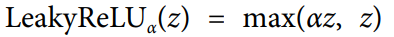


- The hyperparameter α defines how much the function “leaks”:
  - it is the slope of the function for z < 0, and is typically set to 0.01.
- This small slope ensures that leaky ReLUs never die; they can go into a long coma,
  - but they have a chance to eventually wake up.

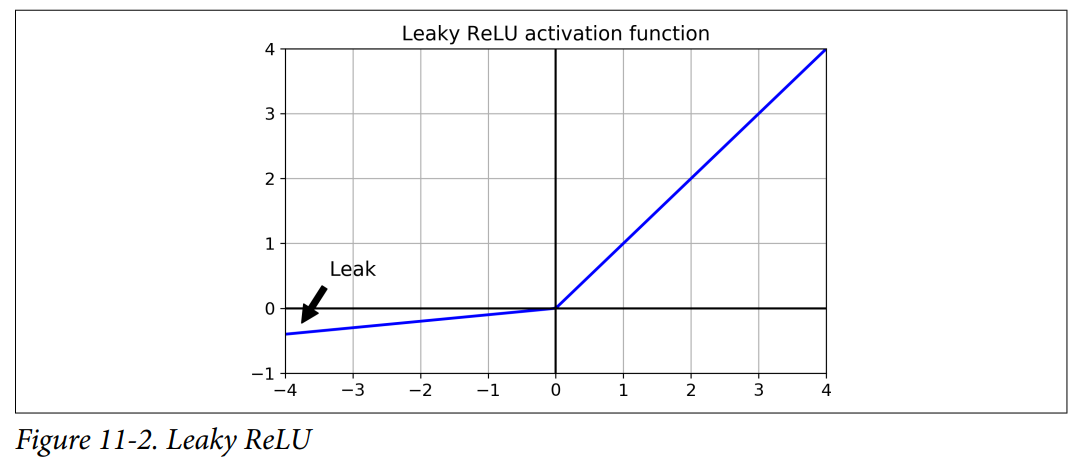

https://arxiv.org/abs/1505.00853 compared different ReLU variants and found that leaky ReLU variants consistently performed better than standard ReLU.

> Using a larger leak (α = 0.2) worked better than a small leak (α = 0.01).

The study also tested Randomized Leaky ReLU (RReLU), where α is random during training and fixed during testing. RReLU performed well and acted as a regularizer, helping reduce overfitting.

Finally, they also evaluated the **parametric leaky ReLU (PReLU)**, where α is authorized to be learned during training (instead of being a hyperparameter, it becomes a parameter that can be modified by backpropagation like any other parameter).
- This was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set.

### ELU (Exponential Linear Unit)

https://arxiv.org/abs/1511.07289

Last but not least, a 2015 paper by Djork-Arné Clevert et al.6 proposed a new activation function called the exponential linear unit (ELU) that outperformed all the ReLU
variants in their experiments